## Setup

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Original CSV

The code in this section is commented out because it simply made the CSV smaller and only needed to be done once at the start of the project. Still, it is retained for completeness.

Load the original CSV (includes all columns) as a pandas dataframe. Print it to see what it looks like.


In [4]:
#wildfire_all = pd.read_csv('/content/drive/MyDrive/ColabFiles/WFIGS_Incident_Locations.csv')
#wildfire_all

<ipython-input-4-764a1983a0f0>:1: DtypeWarning: Columns (13,14,32,63,66,70,71,87,88,92,93,96) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_all = pd.read_csv('/content/drive/MyDrive/ColabFiles/WFIGS_Incident_Locations.csv')


,OBJECTID,SourceOID,ABCDMisc,ADSPermissionState,ContainmentDateTime,ControlDateTime,CreatedBySystem,IncidentSize,DiscoveryAcres,DispatchCenterID,...,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,IsCpxChild,CpxName,CpxID,SourceGlobalID,GlobalID,IncidentComplexityLevel,x,y
0,1,7747595,NaN,DEFAULT,NaN,NaN,lacocad,NaN,0.10,CALACC,...,2/28/2020 8:52:36 PM,2/28/2020 8:52:36 PM,0,NaN,NaN,{6A311ABB-DF4F-4947-B8DD-3900BDA784F6},48d2c0e2-5e38-4d40-9d5e-066b076c7d98,NaN,-118.180700,33.808980
1,2,6384391,NaN,DEFAULT,NaN,NaN,firecode,NaN,NaN,CAMVIC,...,7/1/2019 8:10:12 PM,7/1/2019 8:10:12 PM,0,NaN,NaN,{1AF2C949-B159-4D8F-8D39-90CB58BC5DD5},17d2d66a-d451-4592-a172-7b2c860a2cc9,NaN,-117.153889,33.176389
2,3,1383752,NaN,DEFAULT,NaN,NaN,firecode,NaN,NaN,NaN,...,6/20/2016 10:39:02 PM,6/20/2016 10:39:02 PM,0,NaN,NaN,{1B179EA1-97CE-4699-915B-374754BCBC5B},60c471ff-3c85-41b4-9135-e7338d7ec90b,NaN,-121.104167,38.834722
3,4,22499589,NaN,DEFAULT,NaN,NaN,cfcad,NaN,0.10,CARRCC,...,11/25/2021 3:24:53 PM,11/25/2021 3:24:53 PM,0,NaN,NaN,{E61E387B-4ED7-4971-9604-C5D7391FAF77},149237ec-a42e-43d6-9318-22207a705dd9,NaN,-117.228580,33.782437
4,5,23869477,NaN,DEFAULT,NaN,NaN,lacocad,NaN,0.01,CALACC,...,11/21/2022 11:28:49 AM,11/21/2022 11:28:49 AM,0,NaN,NaN,{AEB6F7A3-A109-4132-9FEB-FB1EE1DF3193},ef7675e3-d5be-412a-a6c1-0d63fc7153c8,NaN,-118.309020,33.941810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340342,438752,33053054,NaN,DEFAULT,NaN,NaN,wildcade,NaN,NaN,FLFIC,...,2/4/2025 2:37:26 PM,2/4/2025 2:37:26 PM,0,NaN,NaN,{C5240D04-A4FA-4B49-A9F0-EA65CEB23B46},2f8c97e8-04c2-4818-aebe-d320f059865e,NaN,-81.025000,26.298889
340343,438754,33053056,NaN,DEFAULT,2/3/2025 9:00:00 PM,NaN,wildcade,6.30,6.30,ARAOC,...,2/4/2025 3:19:38 PM,2/4/2025 3:21:01 PM,0,NaN,NaN,{740B5C1A-465E-4CB1-945D-6942599A4999},fd405298-da5c-4c97-9b83-23eeff893dc4,NaN,-96.366667,35.020833
340344,438755,33053058,NaN,DEFAULT,2/4/2025 12:30:00 AM,NaN,wildcade,5.00,5.00,ARAOC,...,2/4/2025 3:22:30 PM,2/4/2025 3:23:29 PM,0,NaN,NaN,{ADFF0620-2E5E-4B52-8E9D-93302ADB593A},0cba75e9-7e4a-4dcf-893a-565d42b81fd8,NaN,-96.579444,35.499722
340345,438756,33053057,NaN,DEFAULT,NaN,NaN,wildcade,NaN,NaN,CAMNFC,...,2/4/2025 3:21:18 PM,2/4/2025 3:24:07 PM,0,NaN,NaN,{BE747B30-52B8-475B-87C7-BD70853AA6A1},6acbf12e-49ef-4e6d-9166-60140cf5315f,NaN,-122.955700,39.316903


The dataset contains much more information than is necessary. We only want to consider the cost, size, personnel, latitude, longitude, discovery date, and primary fuel model. We also want to get rid of rows where any of this information is missing.

In [5]:
#wildfire_all = wildfire_all[['EstimatedCostToDate','IncidentSize','TotalIncidentPersonnel','InitialLatitude','InitialLongitude','FireDiscoveryDateTime','PrimaryFuelModel']]
#wildfire_all = wildfire_all.dropna()
#wildfire_all

,EstimatedCostToDate,IncidentSize,TotalIncidentPersonnel,InitialLatitude,InitialLongitude,FireDiscoveryDateTime,PrimaryFuelModel
237,1889104.0,350.0,94.0,33.362338,-117.102869,6/23/2021 9:28:23 PM,Chaparral (6 feet)
677,800000.0,1050.0,0.0,36.567370,-119.183199,6/22/2020 7:10:31 AM,Tall Grass (2.5 feet)
982,5000.0,0.1,3.0,29.861600,-93.772640,12/10/2022 1:09:19 AM,Tall Grass (2.5 feet)
1285,42000.0,225.0,10.0,41.555640,-113.621800,8/4/2019 11:57:00 PM,Chaparral (6 feet)
1343,200000.0,1128.8,59.0,40.783333,-115.516667,8/30/2017 12:11:00 AM,Brush (2 feet)
...,...,...,...,...,...,...,...
339036,0.0,555.0,10.0,33.605738,-102.465941,1/17/2025 8:02:48 PM,Tall Grass (2.5 feet)
339324,20000000.0,10425.0,169.0,34.551719,-118.575740,1/22/2025 6:37:00 PM,Chaparral (6 feet)
339443,18285706.0,6625.0,1085.0,32.600524,-116.841271,1/23/2025 9:58:14 PM,Chaparral (6 feet)
339954,90000.0,644.0,77.0,35.806845,-81.987920,1/29/2025 9:05:53 PM,Hardwood Litter


Save this simple CSV with less rows to avoid reading in the original one every time. We'll consider this section to be the PRE pre-processing and ignore it hereafter.

In [6]:
#wildfire_all.to_csv('/content/drive/MyDrive/ColabFiles/wildfire_simple2.csv', index=False)

# Load simple CSV

Read the simplified wildfire CSV that was saved earlier. Print it to see what it looks like.

In [33]:
wildfire_all = pd.read_csv('/content/drive/MyDrive/ColabFiles/wildfire_simple2.csv')
wildfire_all

,EstimatedCostToDate,IncidentSize,TotalIncidentPersonnel,InitialLatitude,InitialLongitude,FireDiscoveryDateTime,PrimaryFuelModel
0,1889104.0,350.0,94.0,33.362338,-117.102869,6/23/2021 9:28:23 PM,Chaparral (6 feet)
1,800000.0,1050.0,0.0,36.567370,-119.183199,6/22/2020 7:10:31 AM,Tall Grass (2.5 feet)
2,5000.0,0.1,3.0,29.861600,-93.772640,12/10/2022 1:09:19 AM,Tall Grass (2.5 feet)
3,42000.0,225.0,10.0,41.555640,-113.621800,8/4/2019 11:57:00 PM,Chaparral (6 feet)
4,200000.0,1128.8,59.0,40.783333,-115.516667,8/30/2017 12:11:00 AM,Brush (2 feet)
...,...,...,...,...,...,...,...
8212,0.0,555.0,10.0,33.605738,-102.465941,1/17/2025 8:02:48 PM,Tall Grass (2.5 feet)
8213,20000000.0,10425.0,169.0,34.551719,-118.575740,1/22/2025 6:37:00 PM,Chaparral (6 feet)
8214,18285706.0,6625.0,1085.0,32.600524,-116.841271,1/23/2025 9:58:14 PM,Chaparral (6 feet)
8215,90000.0,644.0,77.0,35.806845,-81.987920,1/29/2025 9:05:53 PM,Hardwood Litter


This will be a classification problem. We just want to know if the fire is low cost or high cost. We will make a new column to classify fires based on a threshold EstimatedCostToDate.

Investigate EstimatedCostToDate to determine a good threshold value. We want roughly 50/50 split between high and low cost.

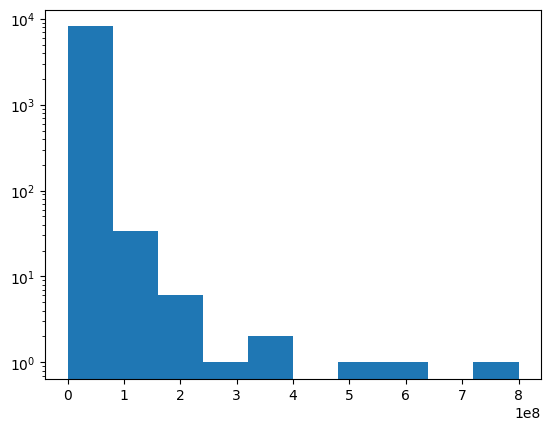

In [34]:
plt.hist(wildfire_all['EstimatedCostToDate'],log=True)
plt.show()

The histogram reveals that the data is skewed towards a lower cost. Let's find a good middle (median) value to split the data.

In [35]:
statistics = wildfire_all['EstimatedCostToDate'].describe()
print(statistics)

count    8.217000e+03
mean     2.757020e+06
std      1.763458e+07
min      0.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      7.000000e+05
max      8.000000e+08
Name: EstimatedCostToDate, dtype: float64


Anything under $100,000 will be considered low cost (0) and anything over is high cost (1).

In [36]:
wildfire_all['Cost']= 0
wildfire_all.loc[wildfire_all['EstimatedCostToDate']>100000, 'Cost'] = 1
wildfire_classify = wildfire_all.drop('EstimatedCostToDate',axis=1)
#wildfire_classify

In [73]:
wildfire_all['Cost'].value_counts()

,count
Cost,
0,4233
1,3984


Another transformation of the data is necessary. We must convert FireDiscoveryDateTime to a day of the year because it holds valuable information about the wildfire seasonality.

In [37]:
wildfire_classify['DayOfYear'] = wildfire_classify['FireDiscoveryDateTime'].str.split().str[0]
wildfire_classify['DayOfYear'] = pd.to_datetime(wildfire_classify['DayOfYear'],format = "%m/%d/%Y")
wildfire_classify['DayOfYear'] = wildfire_classify['DayOfYear'].dt.dayofyear
wildfire_day = wildfire_classify.drop('FireDiscoveryDateTime',axis=1)
#wildfire_day

Now convert the day to a function of sin and cos to achieve cyclical encoding of the feature. The objective here is to have values reflective of the proximity of day 1 and 365; they should not be treated as numerically "far" from each other.

In [38]:
wildfire_day['DayOfYear_sin'] = np.sin(2 * np.pi * wildfire_day['DayOfYear'] / 365)
wildfire_day['DayOfYear_cos'] = np.cos(2 * np.pi * wildfire_day['DayOfYear'] / 365)
wildfire_final = wildfire_day.drop('DayOfYear', axis=1)
#wildfire_final

Make a scatter plot of the sin and cos value and color it by day of year to ensure the cyclical encoding is successful. We should see that day 1 is "next to" day 365 on the plot.

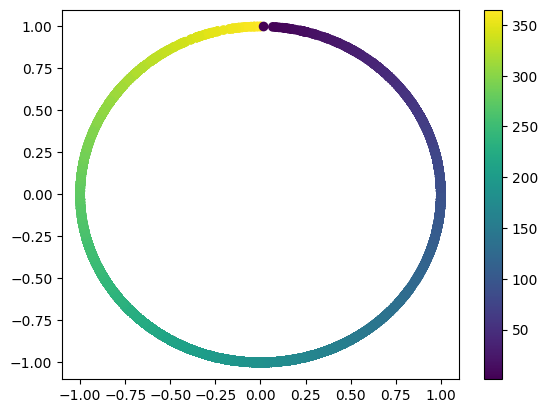

In [39]:
cs = plt.scatter(wildfire_final['DayOfYear_sin'], wildfire_final['DayOfYear_cos'],c=wildfire_day['DayOfYear'])
plt.colorbar(cs)
plt.show()

Great, it worked! We can also plot the sin and cos values individually to see which one better fits the data. Later we will use feature permutation to determine which one is actually more important. Spoiler: it is the cos function.

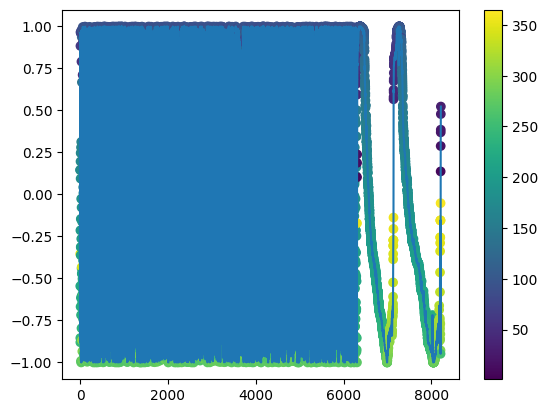

In [42]:
wildfire_day['DayOfYear_sin'].plot()
cs = plt.scatter(range(0,8217), wildfire_final['DayOfYear_sin'], c=wildfire_day['DayOfYear'])
plt.colorbar(cs)
plt.show()

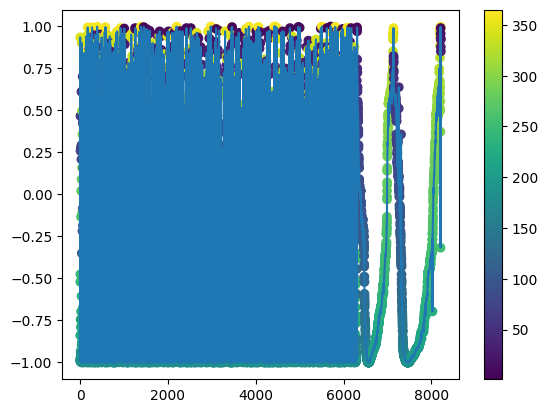

In [43]:
wildfire_day['DayOfYear_cos'].plot()
cs = plt.scatter(range(0,8217), wildfire_final['DayOfYear_cos'], c=wildfire_day['DayOfYear'])
plt.colorbar(cs)
plt.show()

# Split Data, Normalize, Build Model

Split training and test data using 80/20 ratio. Set the random state so that we can reproduce this split.

In [45]:
wildfire_train = wildfire_final.sample(frac=0.8, random_state=0)
wildfire_test = wildfire_final.drop(wildfire_train.index)

#wildfire_train

The task is to predict the cost from the other measurements, so separate the features and labels for training:


In [46]:
train_features = wildfire_train.drop(columns=['Cost'])
train_labels = wildfire_train['Cost']

test_features = wildfire_test.drop(columns=['Cost'])
test_labels = wildfire_test['Cost']

It is important that we split this data BEFORE normalization/further encoding to avoid data leakage. The cyclical "encoding" was more of a transformation so it is okay that we did that first.

## Normalization Layer and Integer Encoding

Now we have to normalize the numerical data and encode the categorical data. We will do these steps separately and then put them back together into one array before ingesting into the model.

Use the sklearn to normalize just the numerical data.

1.  Specify only the numerical columns of interest (i.e., ignore categorical)
2.  Create scaler object
2.  Fit to the training data
3.  Apply the normalization to training and test

In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_cols = ['IncidentSize','TotalIncidentPersonnel','InitialLatitude','InitialLongitude']

train_feat_num = train_features[num_cols]
test_feat_num = test_features[num_cols]

#train_feat_num

In [48]:
train_feat_num.shape

(6574, 4)

Remember to only fit the scaler object to the training data. THEN it will be applied to transform both the training and test features. Fitting it to the test features first would be data leakage!

In [49]:
scaler = MinMaxScaler()
scaler.fit(train_feat_num)

train_feat_num_normalized = scaler.transform(train_feat_num)
test_feat_num_normalized = scaler.transform(test_feat_num)

Explore the normalized data. Did the normalization work? Is still skewed? If so, consider what could be done to fix it.

In [50]:
train_feat_num_normalized

array([[0.003, 0.007, 0.684, 0.352],
       [0.   , 0.005, 0.431, 0.399],
       [0.003, 0.008, 0.451, 0.389],
       ...,
       [0.   , 0.   , 0.532, 0.374],
       [0.   , 0.005, 0.649, 0.377],
       [0.   , 0.005, 0.441, 0.441]])

In [51]:
train_feat_num_normalized.min(axis=0)

array([0., 0., 0., 0.])

In [52]:
train_feat_num_normalized.max(axis=0)

array([1., 1., 1., 1.])

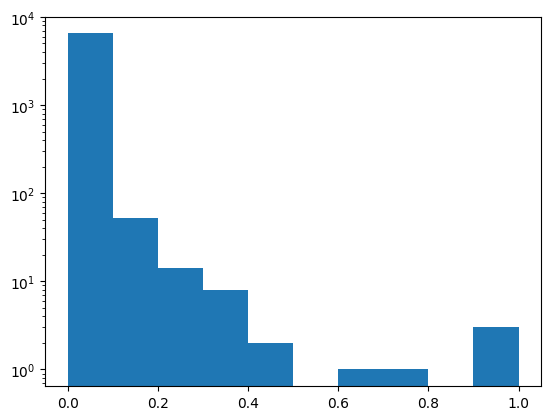

In [56]:
plt.hist(train_feat_num_normalized[:,0],log=True)
plt.show()

Now we must integer encode the categorical data (PrimaryFuelModel).

1.  Only consider the categorical data
2.  Create label encoder
2.  Fit to the training
3.  Apply the encoding to train and test

Print the vocab to see what the strings are.

In [57]:
from sklearn.preprocessing import LabelEncoder

train_feat_cat = train_features['PrimaryFuelModel']
test_feat_cat = test_features['PrimaryFuelModel']

le = LabelEncoder()
le = le.fit(train_feat_cat)

train_feat_cat_encoded = le.transform(train_feat_cat)
test_feat_cat_encoded = le.transform(test_feat_cat)

print(le.classes_.shape)

(13,)


Once again, fit the scaler to just the training data and then use it to transform both the train and test features. This requires reshaping because the categorical data was only a single column.

In [58]:
scalercl = MinMaxScaler()
scalercl.fit(train_feat_cat_encoded.reshape(-1, 1))

train_feat_cat_normalized = scalercl.transform(train_feat_cat_encoded.reshape(-1, 1))
test_feat_cat_normalized = scalercl.transform(test_feat_cat_encoded.reshape(-1, 1))

Explore the encoded data. Is there a unique value corresponding to each of the fuel types? What is the distribution like?

In [59]:
np.unique(train_feat_cat_normalized)

array([0.   , 0.083, 0.167, 0.25 , 0.333, 0.417, 0.5  , 0.583, 0.667,
       0.75 , 0.833, 0.917, 1.   ])

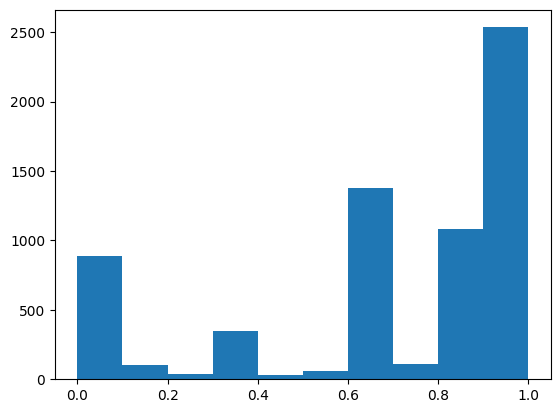

In [60]:
plt.hist(train_feat_cat_normalized)
plt.show()

## Build Binary Model

Combine the numerical and categorical data back into single arrays for train and test. Don't forget to include our day of year (sin and cos) columns as well! The earlier transformation on these values works as a sort of normalization aready. However, notice that other features are scaled 0 through 1 while the sin and cos features are scaled -1 to 1. Consider if this matters.

In [61]:
train_feat = np.concatenate([train_feat_num_normalized,train_feat_cat_normalized,wildfire_train[['DayOfYear_sin','DayOfYear_cos']]], axis=1)
test_feat = np.concatenate([test_feat_num_normalized,test_feat_cat_normalized,wildfire_test[['DayOfYear_sin','DayOfYear_cos']]], axis=1)

In [62]:
train_feat.min(axis=0)

array([ 0.,  0.,  0.,  0.,  0., -1., -1.])

In [63]:
train_feat.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1.])

Build the model! Don't forget to set a seed for reproducibility.

Hyperparameters to tune here are:

*   number of dense layers
*   number of nodes in each layer
*   dropout or other regularization techniques
*   optimizer
*   learning rate
*   loss function
*   and more!

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
import tensorflow as tf

seed = 812
keras.utils.set_random_seed(seed)

model = Sequential([
    Input(shape=(train_feat.shape[1],)),
    Dense(4, activation='relu'),
#    Dropout(0.5),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45 (180.00 B)

 Trainable params: 45 (180.00 B)

 Non-trainable params: 0 (0.00 B)

# Train

Train the model!

Hyperparameters to tune here are:
*   number of epochs
*   bacth size
*   shuffling or other transformations
*   and probably more!



In [66]:
history = model.fit(
    train_feat, train_labels,  # Features and labels for training
    epochs=100,  # You can adjust the number of epochs
    batch_size=32,  # You can adjust the batch size
    validation_split=0.2, # Validation data to track performance
    shuffle=True #(Will produce same results when keras seed is used)
)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5066 - loss: 0.7204 - val_accuracy: 0.6198 - val_loss: 0.6734
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6170 - loss: 0.6734 - val_accuracy: 0.6548 - val_loss: 0.6623
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6453 - loss: 0.6635 - val_accuracy: 0.6586 - val_loss: 0.6531
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6539 - loss: 0.6550 - val_accuracy: 0.6624 - val_loss: 0.6447
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6592 - loss: 0.6471 - val_accuracy: 0.6654 - val_loss: 0.6369
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6584 - loss: 0.6399 - val_accuracy: 0.6677 - val_loss: 0.6300
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6604 - loss: 0.6333 - val_accuracy: 0.6684 - val_loss: 0.6235
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6577 - loss: 0.6274 - val_accu

## Evaluate

Evaluate how the model learned. Use some identifying tags if planning to save and compare multiple models.

In [ ]:
modeltag = 'thresh-1000_hidden-4-2_opt-adam_loss-bin-cr-ent_epoch-100_batch-32_seed-812'
today = '20250503'

First look at the training and validation loss and validation curves. Is there overfitting? Underfitting? More or less epochs needed?

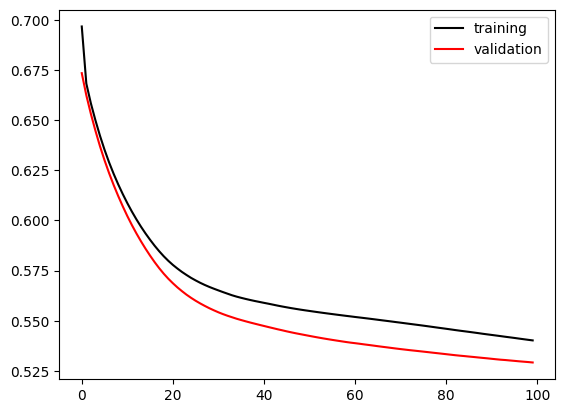

In [114]:
plt.plot(range(0,100), history.history['loss'], c='k',label='training')
plt.plot(range(0,100), history.history['val_loss'], c='r',label='validation')
plt.legend()
plt.show()

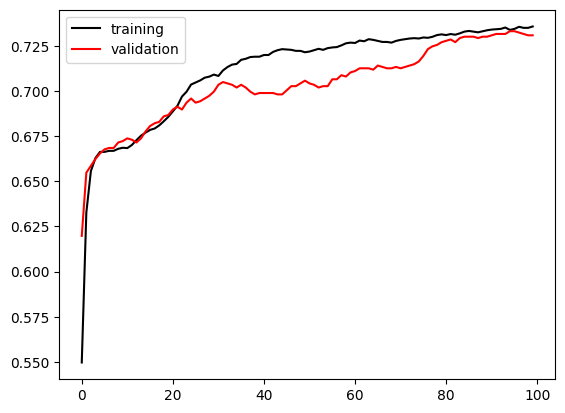

In [115]:
plt.plot(range(0,100), history.history['accuracy'], c='k',label='training')
plt.plot(range(0,100), history.history['val_accuracy'], c='r',label='validation')
plt.legend()
plt.show()

Evaluate the model on unseen data (i.e., the test data).

In [116]:
test_loss, test_accuracy = model.evaluate(test_feat, test_labels)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7301 - loss: 0.5336
Test accuracy: 72.31%


Use some more aesthetic evaluation techniques, such as the confusion matrix.

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


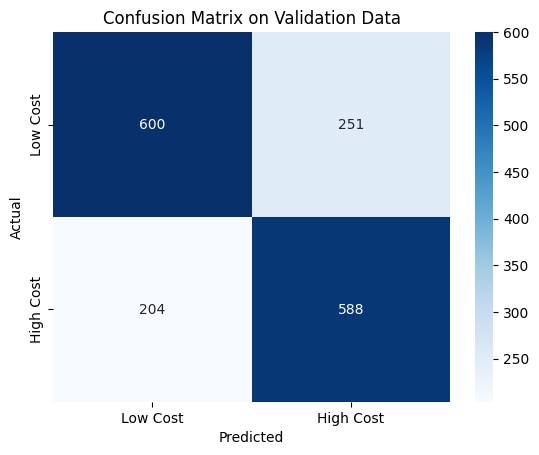

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

test_predictions = model.predict(test_feat)
test_predictions = (test_predictions > 0.5).astype(int)

cm = confusion_matrix(test_labels, test_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Cost', 'High Cost'], yticklabels=['Low Cost', 'High Cost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Validation Data')
plt.show()

Accuracy is not always the best metric. Consider others such as precision, recall, and F1-Score.

In [118]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 0.70, Recall: 0.74, F1-Score: 0.72


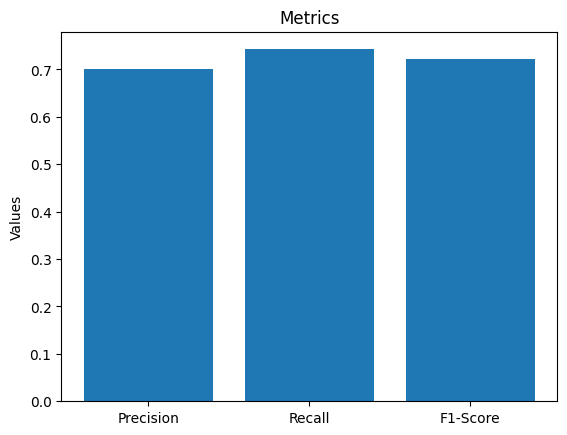

In [119]:
categories = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]
plt.bar(categories, values)
plt.ylabel("Values")
plt.title("Metrics")
plt.show()

# XAI

Time to use eXplainable AI techniques. Some functions work better with the data formatted as a pandas dataframe; we'll quickly turn out train and test data back into pd.DataFrame objects.

In [120]:
feature_names = ['IncidentSize','TotalIncidentPersonnel','InitialLatitude','InitialLongitude','PrimaryFuelModel','DayOfYear_sin','DayOfYear_cos']

df_train_feat = pd.DataFrame(train_feat, columns=feature_names,index=wildfire_train.index)
df_test_feat = pd.DataFrame(test_feat, columns=feature_names,index=wildfire_test.index)

#df_train_feat

We will explore feature importance using both SHAP and SAGE.

Start with SHAP which is best for local interpretability.

In [121]:
import shap

X100 = shap.utils.sample(train_feat, 100)

explainer = shap.Explainer(model, X100)
shap_vals = explainer(test_feat)

shap_vals.shape

ExactExplainer explainer: 1644it [00:21, 39.49it/s]                          


(1643, 7)

Create a SHAP beeswarm plot, colored by feature values when they are provided.

<ipython-input-122-9f8173655f9e>:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_vals, test_feat, feature_names=feature_names)


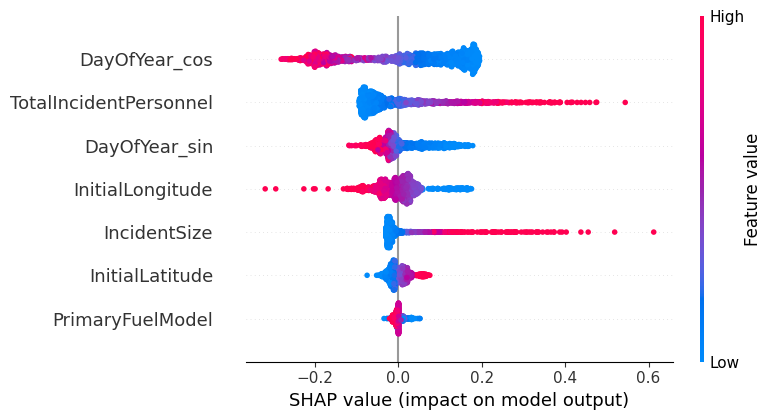

In [122]:
shap.summary_plot(shap_vals, test_feat, feature_names=feature_names)

Plot the global importance of each feature in the model. Optionally use clustering.
0.   'IncidentSize'
1.   'TotalIncidentPersonnel'
2.   'InitialLatitude'
3.   'InitialLongitude'
4.   'PrimaryFuelModel'
5.   'DayOfYear_sin'
6.   'DayOfYear_cos'






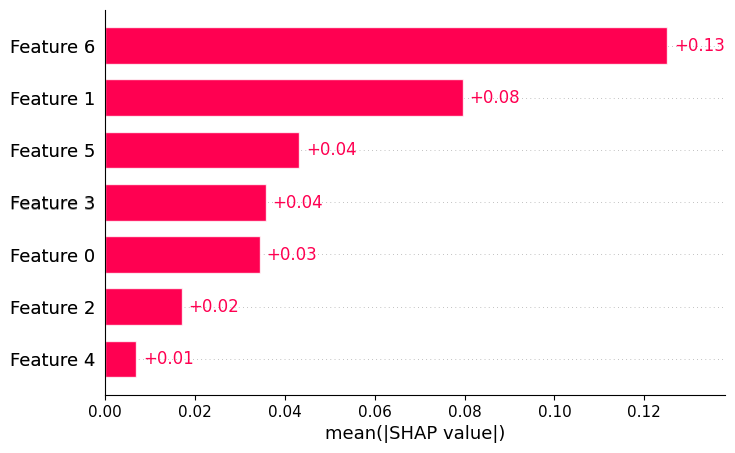

In [123]:
clust = shap.utils.hclust(test_feat, test_labels, linkage="single")
shap.plots.bar(shap_vals)#, clustering=clust, clustering_cutoff=1)

Now use SAGE which is global.

In [124]:
def sage_approx_keras(model, X, y):
  base_loss = model.evaluate(X, y, verbose=0)[0]
  importances = []
  for col in X.columns:
    X_permuted = X.copy()
    X_permuted[col] = np.random.permutation(X_permuted[col])
    permuted_loss = model.evaluate(X_permuted, y, verbose=0)[0]
    importances.append(permuted_loss - base_loss)
  return importances

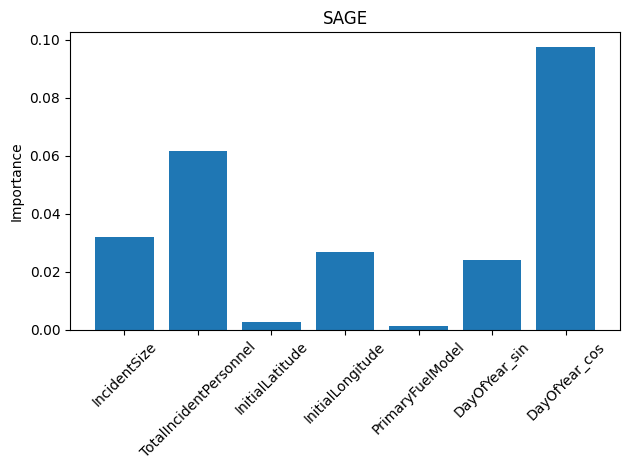

In [127]:
sage_vals = sage_approx_keras(model, df_test_feat, test_labels)
plt.bar(feature_names, sage_vals)
plt.title("SAGE")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusions from XAI. Clearly latitude and fuel model are not very important! Additionally, the sin value representation of the day of year is much less impactful than the cos value.

Moving forward. Latitude and sin are two features I could try removing. Ideally I would adjust how I encode the fuel model feature to boost its significance, but it may just be unnecessary information.

## Predict on "Recent" Data

This section was done at the last minute and is just for fun!

The last entry from the wildfire CSV was from February 1st, 2025. Now that it has been three additional months, use the latest wildfire data to see how model performs. Read in the recent CSV which contains new and unseen data from Feb 1st until May 7th, 2025.

In [86]:
wildfire_recent = pd.read_csv('/content/drive/MyDrive/ColabFiles/WFIGS_recent.csv')

Make all preliminary transformations to the data.

In [88]:
wildfire_recent = wildfire_recent[['EstimatedCostToDate','IncidentSize','TotalIncidentPersonnel','InitialLatitude','InitialLongitude','FireDiscoveryDateTime','PrimaryFuelModel']]
wildfire_recent = wildfire_recent.dropna()
wildfire_recent['Cost']= 0
wildfire_recent.loc[wildfire_recent['EstimatedCostToDate']>100000, 'Cost'] = 1
wildfire_recent = wildfire_recent.drop('EstimatedCostToDate',axis=1)
wildfire_recent['DayOfYear'] = wildfire_recent['FireDiscoveryDateTime'].str.split().str[0]
wildfire_recent['DayOfYear'] = pd.to_datetime(wildfire_recent['DayOfYear'],format = "%m/%d/%Y")
wildfire_recent['DayOfYear'] = wildfire_recent['DayOfYear'].dt.dayofyear
wildfire_recent = wildfire_recent.drop('FireDiscoveryDateTime',axis=1)
wildfire_recent['DayOfYear_sin'] = np.sin(2 * np.pi * wildfire_recent['DayOfYear'] / 365)
wildfire_recent['DayOfYear_cos'] = np.cos(2 * np.pi * wildfire_recent['DayOfYear'] / 365)
wildfire_recent = wildfire_recent.drop('DayOfYear', axis=1)

In [94]:
wildfire_recent

,IncidentSize,TotalIncidentPersonnel,InitialLatitude,InitialLongitude,PrimaryFuelModel,Cost,DayOfYear_sin,DayOfYear_cos
0,840.0,21.0,28.050995,-97.492034,Chaparral (6 feet),0,0.891981,0.452072
1,15973.0,132.0,43.616700,-116.200000,Timber (Litter and Understory),1,0.989932,0.141540
2,0.1,1.0,43.616700,-116.200000,Short Grass (1 foot),0,0.998435,0.055917
3,3900.0,1.0,35.700570,-101.653940,Tall Grass (2.5 feet),0,0.523416,0.852078
4,871.0,6.0,31.374053,-90.893408,Timber (Grass and Understory),0,0.594727,0.803928
...,...,...,...,...,...,...,...,...
321,3.0,8.0,46.250571,-94.272686,Tall Grass (2.5 feet),0,0.845249,-0.534373
322,822.0,182.0,33.354059,-108.591733,Light Logging Slash,1,0.845249,-0.534373
323,2000.0,38.0,47.820556,-102.411944,Short Grass (1 foot),0,0.845249,-0.534373
324,237.0,57.0,48.891944,-99.700278,Tall Grass (2.5 feet),0,0.845249,-0.534373


Split features and labels, then do normalization and encoding.

In [90]:
recent_features = wildfire_recent.drop(columns=['Cost'])
recent_labels = wildfire_recent['Cost']
recent_feat_num = recent_features[num_cols]
recent_feat_num_normalized = scaler.transform(recent_feat_num)
recent_feat_cat = recent_features['PrimaryFuelModel']
recent_feat_cat_encoded = le.transform(recent_feat_cat)
recent_feat_cat_normalized = scalercl.transform(recent_feat_cat_encoded.reshape(-1, 1))

Concatenate back together and predict!

In [91]:
recent_feat = np.concatenate([recent_feat_num_normalized,recent_feat_cat_normalized,wildfire_recent[['DayOfYear_sin','DayOfYear_cos']]], axis=1)
recent_feat

array([[ 0.001,  0.019,  0.41 , ...,  0.083,  0.892,  0.452],
       [ 0.015,  0.12 ,  0.638, ...,  1.   ,  0.99 ,  0.142],
       [ 0.   ,  0.001,  0.638, ...,  0.667,  0.998,  0.056],
       ...,
       [ 0.002,  0.034,  0.7  , ...,  0.667,  0.845, -0.534],
       [ 0.   ,  0.052,  0.715, ...,  0.833,  0.845, -0.534],
       [ 0.005,  0.008,  0.405, ...,  0.667,  0.826, -0.563]])

In [93]:
recent_loss, recent_accuracy = model.evaluate(recent_feat, recent_labels)
print(f"Recent accuracy: {recent_accuracy * 100:.2f}%")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8461 - loss: 0.4276 
Recent accuracy: 86.18%


Looks to be doing really well on this unseen data! Cool! Let's keep evaluating.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


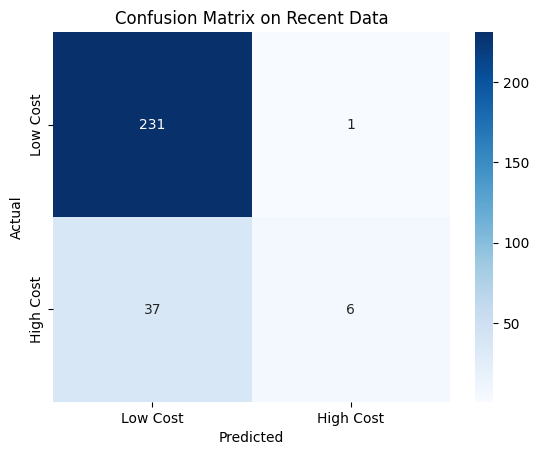

In [95]:
recent_predictions = model.predict(recent_feat)
recent_predictions = (recent_predictions > 0.5).astype(int)

cm = confusion_matrix(recent_labels, recent_predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Cost', 'High Cost'], yticklabels=['Low Cost', 'High Cost'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Recent Data')
plt.show()

Okay... now we see that perhaps the accuracy was high beause guessing low cost usually results in the correct answer. This is a great example of why other evaluation metrics are needed.

In [98]:
precision_recent = precision_score(recent_labels, recent_predictions)
recall_recent = recall_score(recent_labels, recent_predictions)
f1_recent = f1_score(recent_labels, recent_predictions)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 0.86, Recall: 0.14, F1-Score: 0.24


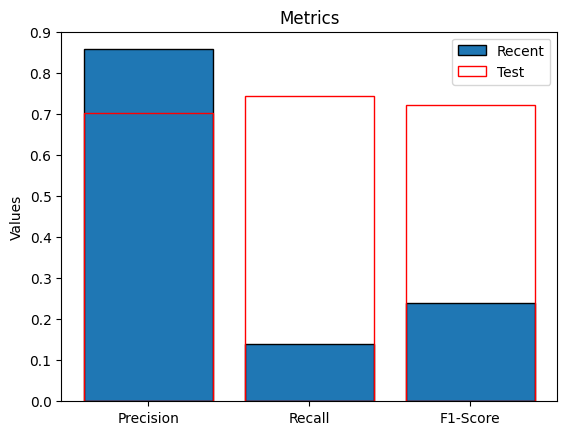

In [112]:
values_recent = [precision_recent, recall_recent, f1_recent]
plt.bar(categories, values_recent, edgecolor='black',label='Recent')
plt.bar(categories, values, facecolor='none', edgecolor='red',label='Test')
plt.legend()
plt.ylabel("Values")
plt.title("Metrics")
plt.show()

Much to think about. I did this little "Recent" experiment the night before my presentation so while I'm happy to discuss potential implications I do not have the capability to re-train the model!

Thanks!